# Feature selection

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

from config_and_dependencies.config import *

pd.set_option('max.rows', None)
pd.set_option('max.columns', None)
%matplotlib inline

### load datasets

In [6]:
#%store -r train_data_formodel
#data = train_data_formodel
%store -r test_data
#%store -r my_data
#%store -r uniques

#Tom Added
%store -r MintCol

In [4]:
#Tom Added
data = test_data

In [5]:
test_data.head()

,ARSENIC,GOLD,COPPER,IRON,NICKEL,LEAD,ANTIMONY,TIN,ZINC,MANGANESE,CHROMIUM,COBALT,BISMUTH,SILVER
0,0.003,0.378,20.60,0.014,0.001,0.59,0.001,0.0023,0.0106,0.00007,0.00005,0.0001,0.009,78.40
1,0.003,0.377,22.99,0.008,0.002,0.63,0.008,0.0270,0.2527,0.00008,0.00005,0.0001,0.021,75.68
2,0.002,0.631,19.30,0.006,0.001,0.46,0.005,0.0010,0.0001,0.00014,0.00004,0.0003,0.000,79.59
3,0.011,0.599,17.08,0.004,0.003,0.29,0.015,0.0009,0.0003,0.00031,0.00004,0.0004,0.000,84.31
4,0.003,0.395,9.60,0.004,0.001,1.09,0.004,0.0013,0.0010,0.00014,0.00006,0.0001,0.029,88.87


In [7]:
MintCol.head()

0    Rome
1    Rome
2    Rome
3    Rome
4    Rome
Name: MINT, dtype: object

In [8]:
#Rename MintCol Column to MINT
MintCol.columns = ['MINT']

In [13]:
#Combine MintCol and Data
data = pd.concat([MintCol, test_data], axis=1)
data.head()

,MINT,ARSENIC,GOLD,COPPER,IRON,NICKEL,LEAD,ANTIMONY,TIN,ZINC,MANGANESE,CHROMIUM,COBALT,BISMUTH,SILVER
0,Rome,0.003,0.378,20.60,0.014,0.001,0.59,0.001,0.0023,0.0106,0.00007,0.00005,0.0001,0.009,78.40
1,Rome,0.003,0.377,22.99,0.008,0.002,0.63,0.008,0.0270,0.2527,0.00008,0.00005,0.0001,0.021,75.68
2,Rome,0.002,0.631,19.30,0.006,0.001,0.46,0.005,0.0010,0.0001,0.00014,0.00004,0.0003,0.000,79.59
3,Rome,0.011,0.599,17.08,0.004,0.003,0.29,0.015,0.0009,0.0003,0.00031,0.00004,0.0004,0.000,84.31
4,Rome,0.003,0.395,9.60,0.004,0.001,1.09,0.004,0.0013,0.0010,0.00014,0.00006,0.0001,0.029,88.87


In [14]:
#X = data[data.columns.values[1:]]
#X.head()

## configurations


In [15]:
save_plots = True

### Recursive feature elimination with 3-fold cross-validation is done using Random Forest Classifiers 

In [16]:
my_rfc = RandomForestClassifier(n_estimators=5, n_jobs=-5, random_state = random_seed_state)

In [17]:
my_rfc_selector = RFECV(estimator=my_rfc, step=1, cv=StratifiedKFold(3), verbose=2, scoring='f1_macro')

### set X and y as features and target respectively

In [18]:
X = data[data.columns.values[1:]]
y = data['MINT']

### check dimensions of features and target are as expected

In [19]:
print(X.shape)
print(y.shape)

(728, 14)
(728,)


### do recursive feature elimination

In [20]:
selector = my_rfc_selector.fit(X, y)

C:\Users\tom\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Fitting estimator with 14 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting estimator with 13 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting estimator with 12 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting estimator with 11 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting estimator with 10 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting estimator with 9 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting estimator with 8 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting estimator with 7 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting estimator with 6 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting estimator with 5 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting estimator with 4 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting estimator with 3 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting estimator with 2 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting estimator with 14 features.
Fitting estimator with 13 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Fitting estimator with 12 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting estimator with 11 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Fitting estimator with 10 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Fitting estimator with 9 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Fitting estimator with 8 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Fitting estimator with 7 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Fitting estimator with 6 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Fitting estimator with 5 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Fitting estimator with 4 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting estimator with 3 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Fitting estimator with 2 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Fitting estimator with 14 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting estimator with 13 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting estimator with 12 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting estimator with 11 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting estimator with 10 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting estimator with 9 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting estimator with 8 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting estimator with 7 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting estimator with 6 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting estimator with 5 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting estimator with 4 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting estimator with 3 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting estimator with 2 features.


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting estimator with 14 features.
Fitting estimator with 13 features.


### identify number of features with the best f1 score


In [21]:
my_rfc_selector.ranking_
feat_ranks = pd.DataFrame(data = {'features': data.columns.values[1:], 'rfe ranking': my_rfc_selector.ranking_} )
feat_ranks.sort_values(by = 'rfe ranking', inplace=True)
best_number_feats_rfe = my_rfc_selector.n_features_

In [22]:
best_number_feats_rfe = 5

### features ranked by their recursive feature elimination scores

In [25]:
feat_ranks.to_csv('Figure/feat_ranks.csv')

### select best features 

In [26]:
best_feats = list(feat_ranks['features'][0: best_number_feats_rfe])

### weighted-f1 score is plotted against number of features

In [27]:
RFCV_df = pd.DataFrame(data = {'Number of Features' : range(1, len(my_rfc_selector.grid_scores_) + 1), 'F1 Score': my_rfc_selector.grid_scores_})

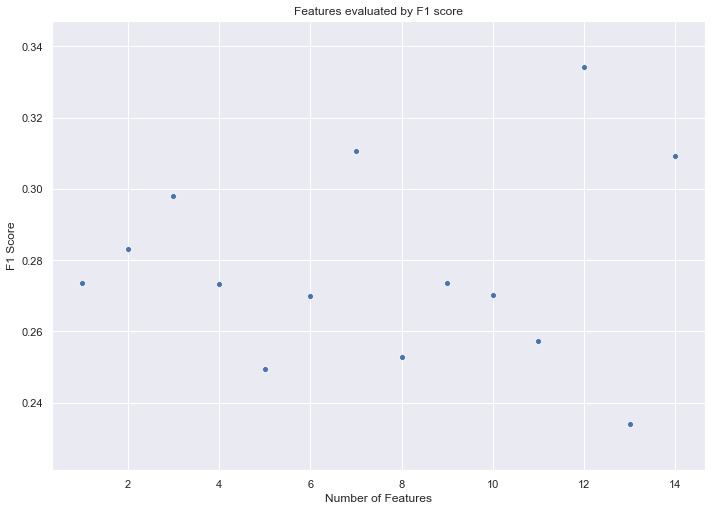

In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.scatterplot(data = RFCV_df, x = 'Number of Features', y = 'F1 Score').set_title('Features evaluated by F1 score')
if save_plots:
    fig = plot.get_figure()
    fig.savefig('Figure/rfe.png')

In [31]:
RFCV_df.to_csv('Figure/RFCV_DF.csv')

In [32]:
print('the best features are {0}'.format(best_feats))

the best features are ['GOLD', 'COPPER', 'IRON', 'NICKEL', 'LEAD']


### the names of the best features and all features in order of recursive feature elimination rank are stored 

In [33]:
%store best_feats

Stored 'best_feats' (list)


In [34]:
len(best_feats)

5